In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from tabulate import tabulate

In [1]:
LAMBDA = 589e-9
breadth = 4.94e-2
depth = 0.207e-2
length = 11.5e-2
g = 9.81
def straight_line(x, m, c): return m*x + c

# longitudinal

### to calculate diameter of the fringes

In [104]:
def x_axis(m, left_fringes, right_fringes):
    n_x = np.arange(1, len(left_fringes))
    D_x = (left_fringes - right_fringes)
    D_x2 = np.power(D_x, 2)
    
    # Dnx = 2xn => xn^2 = Dnx^2/4
    rho_x = ((D_x2) - np.min(D_x2)) / 4
    R_x = np.append([0], (rho_x[1:]*1000)/(n_x*589))
    R_avg_x = np.mean(R_x[1:])
    
    print(f'For {m}g:')
    print('D:', D_x)
    print('Dx^2:', D_x2)
    print('rho_x:', rho_x)
    print('R_x:', R_x)
    print('R_avg_x:', R_avg_x)
    
    table = [[i+1, left_fringes[i], right_fringes[i], D_x[i], round(rho_x[i], 2), round(R_x[i], 2)] for i in range(len(left_fringes))]
    
    return rho_x, table

### Young's modulus

In [141]:
def youngs_modulus(mi, mj, rho_x_i, rho_x_j, plot_shape='bo'):
    yn_max = min(len(rho_x_i), len(rho_x_j))
    ys = 1/((1/rho_x_j[1:yn_max]) - (1/rho_x_i[1:yn_max]))
    xs = np.arange(1, yn_max)
    popt, pcov = curve_fit(straight_line, xs, ys)
    slope = popt[0]
    Y = (slope*10e-6*12*(mj-mi)*0.001*g*length)/(breadth*(depth**3)*LAMBDA)
    print(f'{Y/10e9} GPa')
    
    ylabel = r"$\frac{1}{\frac{1}{\rho_{x}^1}-\frac{1}{\rho_{x}^2}}$ ($mm^2$)"
    xlabel = r"Order of fringe $(s)$"
    title = r"$\frac{1}{\frac{1}{\rho_{x}^1}-\frac{1}{\rho_{x}^2}}$ vs $s$ plot for " +''+ r"$m_1 = $"+str(mj)+r"g and $m_2 = $"+str(mi)+"g"
    
    plotting_function(xs, ys, xlabel, ylabel, title, pcov, popt, plot_shape=plot_shape)
    

In [188]:
def plotting_function(xs, ys, xlabel, ylabel, title, pcov, popt, plot_shape='bo', round_to=4):
    text = "If the Equation is y = mx + c\nFor the best fit curve:\n"
    text += f"    m = {round(popt[0], round_to)} ± {round((pcov[0][0])**0.5, round_to+2)}\n"
    text += f"    c = {round(popt[1], round_to)} ± {round((pcov[1][1])**0.5, round_to+2)}\n"
    print(text)
    print("The curve looks like:")
    span = max(xs) - min(xs)
    a = 0.05 # amount of free space to be shown before the least point and after the maximum
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.plot(xs, ys, plot_shape) 
    plt.plot(xFit, straight_line(xFit, popt[0], popt[1]), 'r')

    # error lines 
    # plt.plot(xFit, func(xFit, popt[0]+((pcov[0][0])**0.5), popt[1]+((pcov[1][1])**0.5)), "b--") # "b--" means blue dashed lines                          ^                            ^
    # plt.plot(xFit, func(xFit, popt[0]-((pcov[0][0])**0.5), popt[1]-((pcov[1][1])**0.5)), "b--")

    plt.legend(["Data Points", "Least Square Fit", "Error Boundaries"])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.text(0.5, 0.15, text, fontsize=12, transform=plt.gcf().transFigure)
#     plt.title(title)

### 200g load (x-axis)

In [173]:
m1 = 200
left_fringes_1 = np.array([9.24, 10.38, 11.18, 12.41, 13.05, 13.55, 14.10])
right_fringes_1 = np.array([5.40, 3.89, 3.02, 2.23, 1.48, 0.82, 0.18])
rho_x_1, table_1 = x_axis(m1, left_fringes_1, right_fringes_1)

print(tabulate(table_1, tablefmt="latex"))

For 200g:
D: [ 3.84  6.49  8.16 10.18 11.57 12.73 13.92]
Dx^2: [ 14.7456  42.1201  66.5856 103.6324 133.8649 162.0529 193.7664]
rho_x: [ 0.        6.843625 12.96     22.2217   29.779825 36.826825 44.7552  ]
R_x: [ 0.         11.61905772 11.00169779 12.57594793 12.63999363 12.50486418
 12.66417657]
R_avg_x: 12.167622972080737
\begin{tabular}{rrrrrr}
\hline
 1 &  9.24 & 5.4  &  3.84 &  0    &  0    \\
 2 & 10.38 & 3.89 &  6.49 &  6.84 & 11.62 \\
 3 & 11.18 & 3.02 &  8.16 & 12.96 & 11    \\
 4 & 12.41 & 2.23 & 10.18 & 22.22 & 12.58 \\
 5 & 13.05 & 1.48 & 11.57 & 29.78 & 12.64 \\
 6 & 13.55 & 0.82 & 12.73 & 36.83 & 12.5  \\
 7 & 14.1  & 0.18 & 13.92 & 44.76 & 12.66 \\
\hline
\end{tabular}


### 250g load (x-axis)

In [198]:
m2 = 250
left_fringes_2 = np.array([13.58, 14.50, 15.86, 16.53, 17.13, 17.64, 18.10, 18.55])
right_fringes_2 = np.array([11.65,  10.72, 9.40, 8.13,  7.5 ,  6.92,  6.38,  5.89])
rho_x_2, table_2 = x_axis(m2, left_fringes_2, right_fringes_2)

print(tabulate(table_2, tablefmt="latex"))

For 250g:
D: [ 1.93  3.78  6.46  8.4   9.63 10.72 11.72 12.66]
Dx^2: [  3.7249  14.2884  41.7316  70.56    92.7369 114.9184 137.3584 160.2756]
rho_x: [ 0.        2.640875  9.501675 16.708775 22.253    27.798375 33.408375
 39.137675]
R_x: [0.         4.48365874 8.06593803 9.45601302 9.44524618 9.43917657
 9.45341681 9.49252365]
R_avg_x: 8.547996142429806
\begin{tabular}{rrrrrr}
\hline
 1 & 13.58 & 11.65 &  1.93 &  0    & 0    \\
 2 & 14.5  & 10.72 &  3.78 &  2.64 & 4.48 \\
 3 & 15.86 &  9.4  &  6.46 &  9.5  & 8.07 \\
 4 & 16.53 &  8.13 &  8.4  & 16.71 & 9.46 \\
 5 & 17.13 &  7.5  &  9.63 & 22.25 & 9.45 \\
 6 & 17.64 &  6.92 & 10.72 & 27.8  & 9.44 \\
 7 & 18.1  &  6.38 & 11.72 & 33.41 & 9.45 \\
 8 & 18.55 &  5.89 & 12.66 & 39.14 & 9.49 \\
\hline
\end{tabular}


### 300g load (x-axis)

In [136]:
m3 = 300
left_fringes_3 = np.array([13.03, 14.24, 15, 16.17, 16.69, 17.1, 17.56, 17.98])
right_fringes_3 = np.array([9.94, 9.04, 8.37, 7.82, 7.38, 6.91, 6.51, 6.12])
rho_x_3, table_3 = x_axis(m3, left_fringes_3, right_fringes_3)

print(tabulate(table_3, tablefmt="latex"))

For 300g:
D: [ 3.09  5.2   6.63  8.35  9.31 10.19 11.05 11.86]
Dx^2: [  9.5481  27.04    43.9569  69.7225  86.6761 103.8361 122.1025 140.6596]
rho_x: [ 0.        4.372975  8.6022   15.0436   19.282    23.572    28.1386
 32.777875]
R_x: [0.         7.42440577 7.30237691 8.51363894 8.18421053 8.0040747
 7.96225241 7.95000606]
R_avg_x: 7.905852188073873
\begin{tabular}{rrrrrr}
\hline
 1 & 13.03 & 9.94 &  3.09 &  0    & 0    \\
 2 & 14.24 & 9.04 &  5.2  &  4.37 & 7.42 \\
 3 & 15    & 8.37 &  6.63 &  8.6  & 7.3  \\
 4 & 16.17 & 7.82 &  8.35 & 15.04 & 8.51 \\
 5 & 16.69 & 7.38 &  9.31 & 19.28 & 8.18 \\
 6 & 17.1  & 6.91 & 10.19 & 23.57 & 8    \\
 7 & 17.56 & 6.51 & 11.05 & 28.14 & 7.96 \\
 8 & 17.98 & 6.12 & 11.86 & 32.78 & 7.95 \\
\hline
\end{tabular}


## calculation of young's modulus

66.79881204240311 GPa
If the Equation is y = mx + c
For the best fit curve:
    m = 25.4685 ± 1.249192
    c = -15.7293 ± 4.864902

The curve looks like:


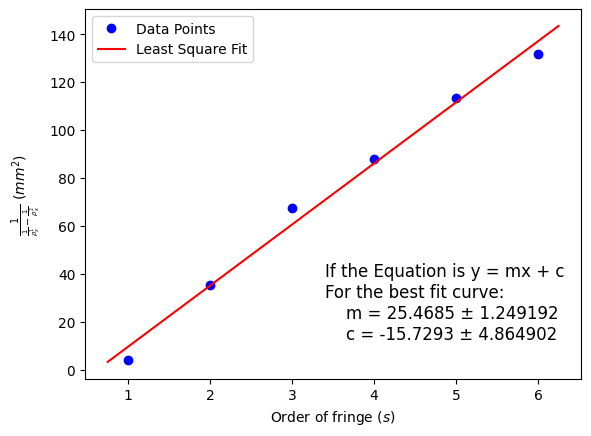

In [200]:
youngs_modulus(m1, m2, rho_x_1, rho_x_2, plot_shape='bo')

75.33660761205654 GPa
If the Equation is y = mx + c
For the best fit curve:
    m = 28.7238 ± 6.471109
    c = 15.7791 ± 28.939679

The curve looks like:


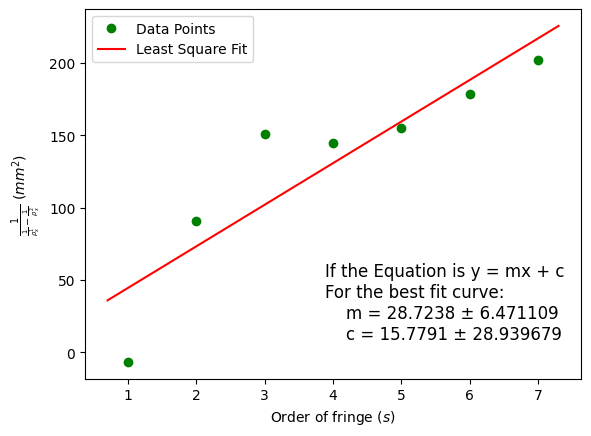

In [199]:
youngs_modulus(m2, m3, rho_x_2, rho_x_3, plot_shape='go')

66.87864224265931 GPa
If the Equation is y = mx + c
For the best fit curve:
    m = 12.7495 ± 0.932371
    c = 2.0845 ± 3.631064

The curve looks like:


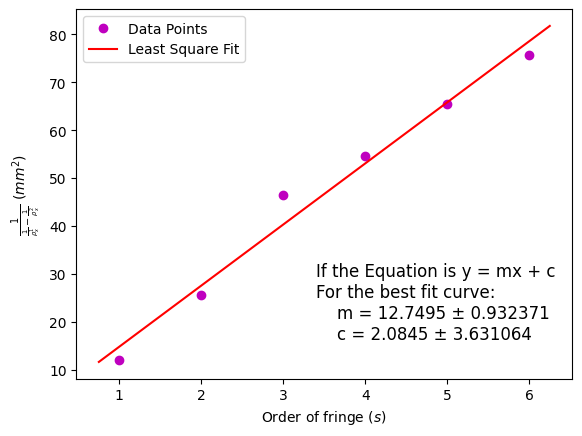

In [191]:
youngs_modulus(m1, m3, rho_x_1, rho_x_3, plot_shape='mo')

# Poisson's Ratio

In [110]:
def y_axis(m, top_fringes, bottom_fringes):
    n_y = np.arange(1, len(top_fringes))
    D_y = (top_fringes - bottom_fringes)
    D_y2 = np.power(D_y, 2)
    rho_y = ((D_y2) - np.min(D_y2)) / 4
    R_y = np.append([0], (rho_y[1:]*1000)/(n_y*589))
    R_avg_y = np.mean(R_y)
    
    print(f'For {m}g:')
    print('D:', D_y)
    print('Dy^2:', D_y2)
    print('rho_y:', rho_y)
    print('R_y:', R_y)
    print('R_avg_y:', R_avg_y)
    
    table = [[i+1, top_fringes[i], bottom_fringes[i], D_y[i], round(rho_y[i], 2), round(R_y[i], 2)] for i in range(len(bottom_fringes))]
    
    return rho_y, table

## 200g (y-axis)

In [111]:
top_fringes_1 = np.array([8.01, 6.55, 5.01, 4.52, 3.53])
bottom_fringes_1 = np.array([17.5, 20.02, 22.24, 24.07, 25.99])
rho_y_1, table_4 = y_axis(200, top_fringes_1, bottom_fringes_1)

print(tabulate(table_4, tablefmt="latex"))

For 200g:
D: [ -9.49 -13.47 -17.23 -19.55 -22.46]
Dy^2: [ 90.0601 181.4409 296.8729 382.2025 504.4516]
rho_y: [  0.        22.8452    51.7032    73.0356   103.597875]
R_y: [ 0.         38.78641766 43.89066214 41.33310696 43.97193336]
R_avg_y: 33.59642402376909
\begin{tabular}{rrrrrr}
\hline
 1 & 8.01 & 17.5  &  -9.49 &   0    &  0    \\
 2 & 6.55 & 20.02 & -13.47 &  22.85 & 38.79 \\
 3 & 5.01 & 22.24 & -17.23 &  51.7  & 43.89 \\
 4 & 4.52 & 24.07 & -19.55 &  73.04 & 41.33 \\
 5 & 3.53 & 25.99 & -22.46 & 103.6  & 43.97 \\
\hline
\end{tabular}


## 250g (y-axis)

In [112]:
top_fringes_2 = np.array([15.21, 18.0, 19.99, 21.66, 23.36, 25.62])
bottom_fringes_2 = np.array([9.60, 6.97, 5.66, 4.72, 3.84, 3.4])
rho_y_2, table_5 = y_axis(250, top_fringes_2, bottom_fringes_2)

print(tabulate(table_5, tablefmt="latex"))

For 250g:
D: [ 5.61 11.03 14.33 16.94 19.52 22.22]
Dy^2: [ 31.4721 121.6609 205.3489 286.9636 381.0304 493.7284]
rho_y: [  0.        22.5472    43.4692    63.872875  87.389575 115.564075]
R_y: [ 0.         38.28047538 36.9008489  36.14763724 37.09234932 39.2407725 ]
R_avg_y: 31.277013888888888
\begin{tabular}{rrrrrr}
\hline
 1 & 15.21 & 9.6  &  5.61 &   0    &  0    \\
 2 & 18    & 6.97 & 11.03 &  22.55 & 38.28 \\
 3 & 19.99 & 5.66 & 14.33 &  43.47 & 36.9  \\
 4 & 21.66 & 4.72 & 16.94 &  63.87 & 36.15 \\
 5 & 23.36 & 3.84 & 19.52 &  87.39 & 37.09 \\
 6 & 25.62 & 3.4  & 22.22 & 115.56 & 39.24 \\
\hline
\end{tabular}


## 300g (y-axis)

In [113]:
top_fringes_3 = np.array([15.48, 17.95, 19.76, 21.29, 21.85, 22.69, 23.47])
bottom_fringes_3 = np.array([10.64, 7.84, 5.68, 4.26, 3.07, 1.99, 0.91])
rho_y_3, table_6 = y_axis(250, top_fringes_3, bottom_fringes_3)

print(tabulate(table_6, tablefmt="latex"))

For 250g:
D: [ 4.84 10.11 14.08 17.03 18.78 20.7  22.56]
Dy^2: [ 23.4256 102.2121 198.2464 290.0209 352.6884 428.49   508.9536]
rho_y: [  0.        19.696625  43.7052    66.648825  82.3157   101.2661
 121.382   ]
R_y: [ 0.         33.44078947 37.10118846 37.71863328 34.93875212 34.3857725
 34.34691568]
R_avg_y: 30.27600735710244
\begin{tabular}{rrrrrr}
\hline
 1 & 15.48 & 10.64 &  4.84 &   0    &  0    \\
 2 & 17.95 &  7.84 & 10.11 &  19.7  & 33.44 \\
 3 & 19.76 &  5.68 & 14.08 &  43.71 & 37.1  \\
 4 & 21.29 &  4.26 & 17.03 &  66.65 & 37.72 \\
 5 & 21.85 &  3.07 & 18.78 &  82.32 & 34.94 \\
 6 & 22.69 &  1.99 & 20.7  & 101.27 & 34.39 \\
 7 & 23.47 &  0.91 & 22.56 & 121.38 & 34.35 \\
\hline
\end{tabular}


## Calculating Poisson's Ratio

In [194]:
def poissons_ratio(rho_x, rho_y, m):
    n_max = min(len(rho_x), len(rho_y))
    xs = rho_y[:n_max]
    ys = rho_x[:n_max]
    popt, pcov = curve_fit(straight_line, xs, ys)
    slope = popt[0]
    sigma = slope
    
    ylabel = r"$\rho_x$ $(mm^2)$"
    xlabel = r"$\rho_y$ $(mm^2)$"
    title = r"$\rho_x$ vs $\rho_y$ for m = "+str(m)+"g"
    
    plotting_function(xs, ys, xlabel, ylabel, title, pcov, popt, plot_shape='b^')
    
    return sigma

If the Equation is y = mx + c
For the best fit curve:
    m = 0.2901 ± 0.016033
    c = -0.2129 ± 0.995124

The curve looks like:


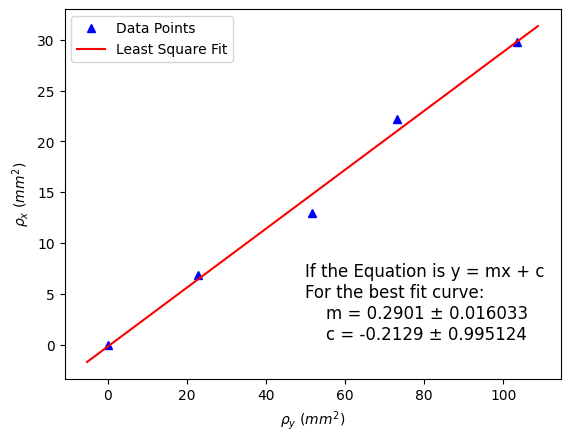

In [195]:
sigma_1 = poissons_ratio(rho_x_1, rho_y_1, 200)

If the Equation is y = mx + c
For the best fit curve:
    m = 0.2539 ± 0.012657
    c = -0.768 ± 0.85643

The curve looks like:


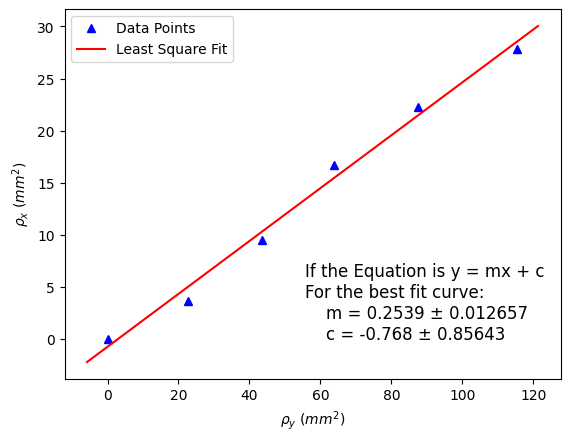

In [196]:
sigma_2 = poissons_ratio(rho_x_2, rho_y_2, 250)

If the Equation is y = mx + c
For the best fit curve:
    m = 0.2355 ± 0.005838
    c = -0.4914 ± 0.432988

The curve looks like:


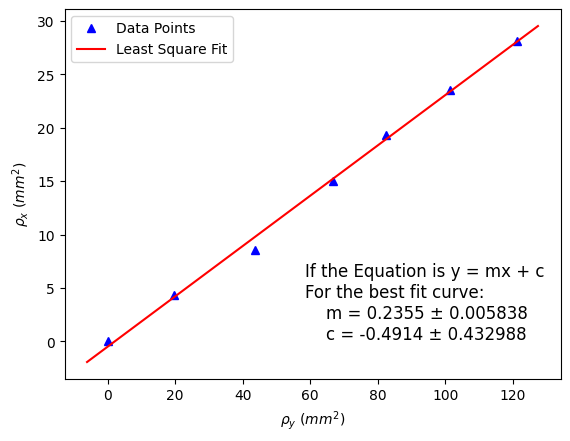

In [197]:
sigma_3 = poissons_ratio(rho_x_3, rho_y_3, 300)

In [65]:
sigma = (sigma_1+sigma_2+sigma_3)/3
print('Poisson\'s Ratio:', sigma)
sigma_1, sigma_2, sigma_3, sigma

Poisson's Ratio: 0.2549457944153102


(0.29653885260174806,
 0.23278573880098646,
 0.2355127918431961,
 0.2549457944153102)